# Konrad Werbliński - pracownia 3, zadanie 3

In [3]:
using PyPlot

# Kod

### Generowanie punktów początkowych

In [4]:
function even_spaced_points(n, a, b, t)
    res = t[]
    for i in [0 : n + 1;]
        push!(res, a + i * (b - a) / (n + 1))
    end
    res
end

even_spaced_points (generic function with 1 method)

In [5]:
function chebyshev_extremes_points(n, a, b, t)    
    res = t[]
    for i in [0 : n + 1;]
        push!(res, (a + b) / t(2) + (b - a) / t(2) * cos(i * pi / (n + 1)))
    end
    sort(res)
end

chebyshev_extremes_points (generic function with 1 method)

### Obliczanie ilorazów różnicowych

In [6]:
function divided_differences(f, points)
    res = map(f, points) 
    for i in [1 : length(points - 1);]
        for j in [length(points): -1 : i + 1;]
            res[j] = (res[j] - res[j - 1]) / (points[j] - points[j - i]) 
        end
    end    
    res
end

divided_differences (generic function with 1 method)

### Aproksymacja jednostajna na zbiorze dyskretnym

In [7]:
function discrete_approx_poly(f, points) 
    _s = Dict{typeof(points[1]), typeof(points[1])}()
    for i in [0 : length(points) - 1;]
        _s[points[i + 1]] = (i % 2 == 0 ? 1 : -1)
    end
    s(x)= _s[x] 
    sd = divided_differences(s, points)
    fd = divided_differences(f, points)
    eps = fd[end] / sd[end]
    
    d(x) = f(x) - eps * s(x)
    dd =  divided_differences(d, points)
    
    function p(x)  
        res = 0 
        w = 1
        for i in [1 : length(points) - 1;]
            res += dd[i] * w
            w *= (x - points[i])
        end
        res
    end

end

discrete_approx_poly (generic function with 1 method)

### Szukanie ekstremum błędu

In [8]:
function by_adaptive_sampling(f, w, a, b, n, steps)
    res = b
    for x in linspace(a, b, n) 
        if abs(f(x) - w(x)) >= abs(f(res) - w(res))
            res = x
        end
    end
    
    if steps == 0
        res
    else
        by_adaptive_sampling(f, w, max(res - (b - a) / n, a), min(res + (b - a) / n, b), n + 1, steps  -1)  
  end
end

by_adaptive_sampling (generic function with 1 method)

In [9]:
function find_max(f, w, a, b)
    by_adaptive_sampling(f, w, a, b, 100, 16)
end

find_max (generic function with 1 method)

### Algorytm Remeza

In [10]:
function remez_algorithm(f, points, a, b, iters)
    points = copy(points)
    
    #wyliczenie pierwszego wielomianu oraz punktu z max błędem
    p = discrete_approx_poly(f, points)  
    mx = find_max(f, p, a, b)
    #wyliczenie pierwszego wielomianu oraz punktu z max błędem - koniec
    
    step = 2
    
    while abs(f(mx) - p(mx)) > maximum(map(x ->abs(f(x) - p(x)), points)) && step <= iters
     
        
        if mx in points
            break
        end
        
        #wybór punktu do wymiany
        if mx < points[1] 
            if(f(points[1]) - p(points[1])) * (f(mx) - p(mx)) < 0
                for i in [2 : length(points)];
                    points[i] = points[i - 1]
                end
            end
            points[1] = mx
                
        elseif mx > points[end]
            if(f(points[end]) - p(points[end])) * (f(mx) - p(mx)) < 0
                for i in [1 : length(points) - 1]
                    points[i] = points[i + 1]
                end
            end
            points[end] = mx
                       
        else 
            k = 2
            while mx > points[k] && k < length(points) 
                k += 1
            end 
        
            if(f(points[k]) - p(points[k])) * (f(mx) - p(mx)) > 0
                points[k] = mx
            else
                points[k - 1] = mx
            end
        end
        #wybór punktu do wymiany - koniec
        
        #wyliczanie nowego wielomianu
        p = discrete_approx_poly(f, points)  
        mx = find_max(f, p, a, b)
        #wyliczanie nowego wielomianu - koniec    
        
        step += 1
    end
   
    p
end

remez_algorithm (generic function with 1 method)

# Doświadczenia

## Funkcja Rungego

In [11]:
f(x) = 1 / (1 + 25 * x^2)
n = 14
iterations = 21
a = -1.0
b = 1.0

1.0

#### Punkty startowe równoodległe

In [12]:
pts = even_spaced_points(n, a, b, BigFloat)
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), iterations)

(::p) (generic function with 1 method)

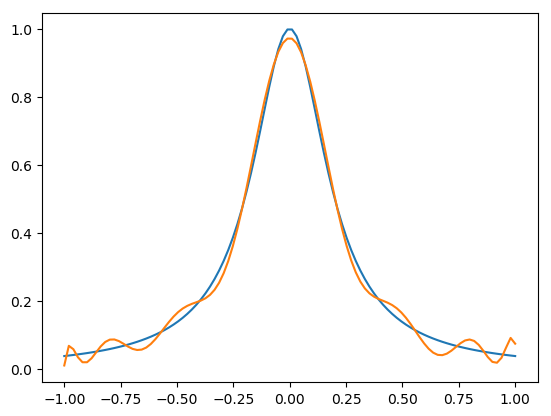

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000033F5A470>

In [13]:
plot(linspace(a, b, 100), map(f, linspace(a, b, 100)))
plot(linspace(a, b, 100), map(x -> Float64(remez_poly(x)), linspace(a, b, 100)))

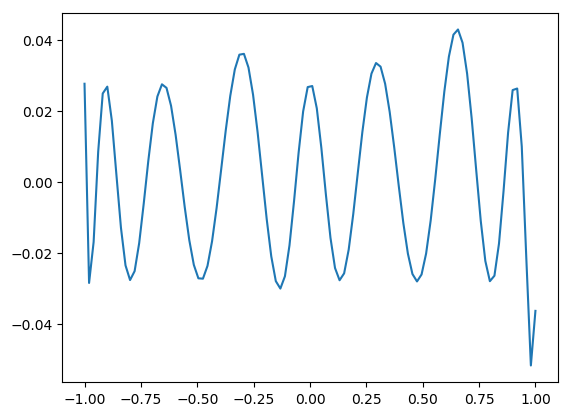

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000342A71D0>

In [14]:
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### Punkty startowe Czebyszewa

In [15]:
pts = chebyshev_extremes_points(n, a, b, BigFloat)
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), iterations)

(::p) (generic function with 1 method)

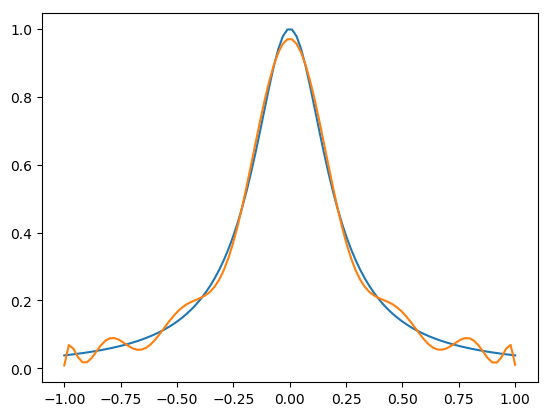

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003453F4E0>

In [16]:
plot(linspace(a, b, 100), map(f, linspace(a, b, 100)))
plot(linspace(a, b, 100), map(x -> Float64(remez_poly(x)), linspace(a, b, 100)))

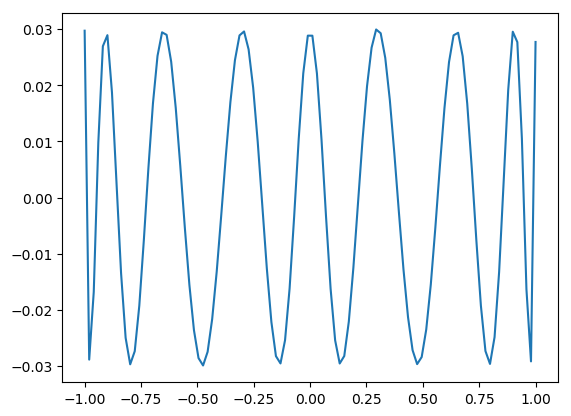

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000034751B70>

In [17]:
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

## Funkcja kawałkami liniowa 

In [18]:
function f(x) 
    if x >= 0 && x <= 4 
        3 * x
    elseif x > 4
        -14 * x + 4 * (14 + 3)
    elseif x >= -2
        0
    else
        -5 * x - 10
    end
end

#To chwilę trwa 
n = 54
iterations = 55
a = -10.0
b = 10.0

10.0

#### Punkty startowe równoodległe

In [19]:
pts = even_spaced_points(n, a, b, BigFloat)
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), iterations)

(::p) (generic function with 1 method)

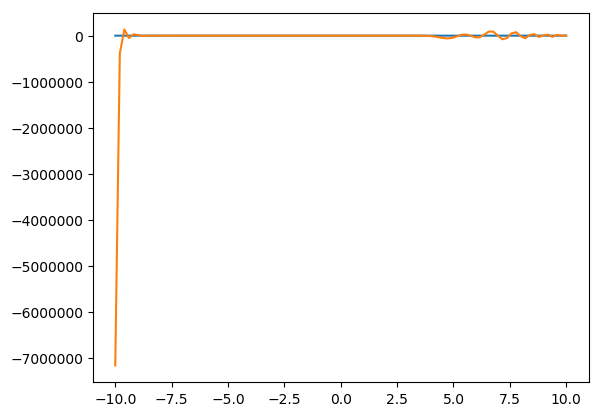

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000034A6D240>

In [20]:
plot(linspace(a, b, 100), map(f, linspace(a, b, 100)))
plot(linspace(a, b, 100), map(x -> Float64(remez_poly(x)), linspace(a, b, 100)))

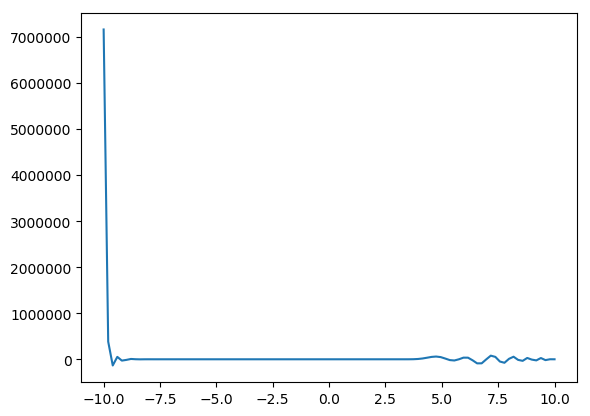

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000034C021D0>

In [21]:
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### Punkty startowe Czebyszewa

In [22]:
pts = chebyshev_extremes_points(n, a, b, BigFloat)
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), iterations)

(::p) (generic function with 1 method)

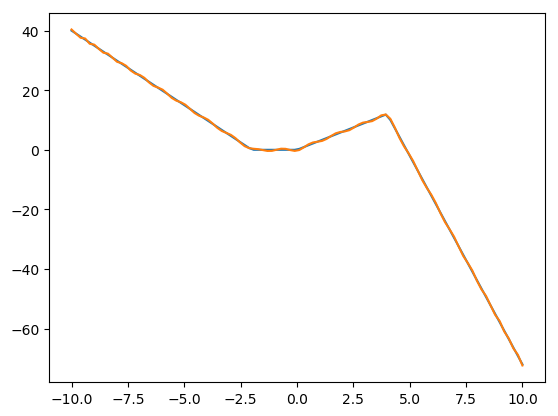

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000038C88CC0>

In [23]:
plot(linspace(a, b, 100), map(f, linspace(a, b, 100)))
plot(linspace(a, b, 100), map(x -> Float64(remez_poly(x)), linspace(a, b, 100)))

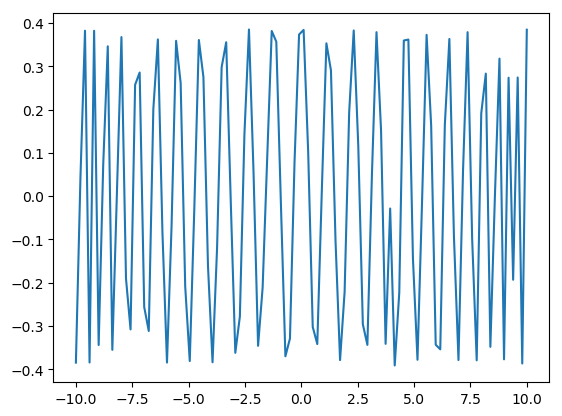

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000038ECC2B0>

In [24]:
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

## Sinus

In [25]:
f(x) = sin(x)
n = 22
iterations = 25
a = -20.0
b = 10.0

10.0

#### Punkty startowe równoodległe

In [26]:
pts = even_spaced_points(n, a, b, BigFloat)
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), iterations)

(::p) (generic function with 1 method)

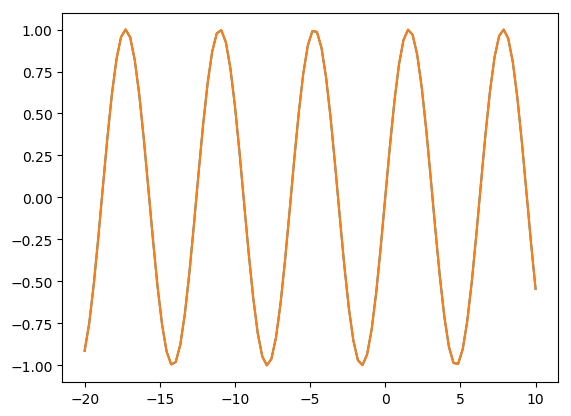

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000039022320>

In [27]:
plot(linspace(a, b, 100), map(f, linspace(a, b, 100)))
plot(linspace(a, b, 100), map(x -> Float64(remez_poly(x)), linspace(a, b, 100)))

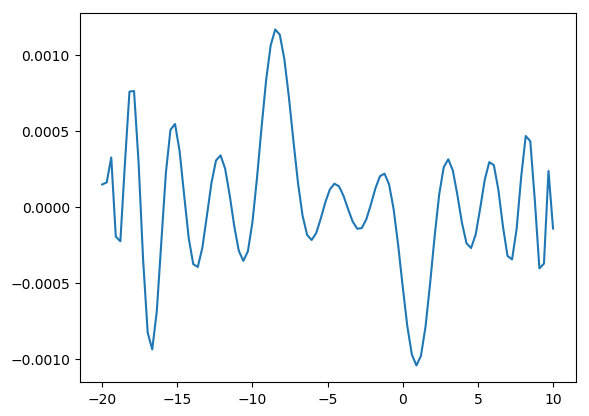

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000039320E10>

In [28]:
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### Punkty startowe Czebyszewa

In [29]:
pts = chebyshev_extremes_points(n, a, b, BigFloat)
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), iterations)

(::p) (generic function with 1 method)

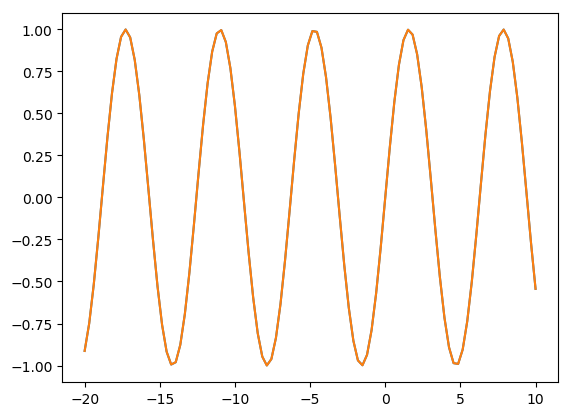

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003970E320>

In [30]:
plot(linspace(a, b, 100), map(f, linspace(a, b, 100)))
plot(linspace(a, b, 100), map(x -> Float64(remez_poly(x)), linspace(a, b, 100)))

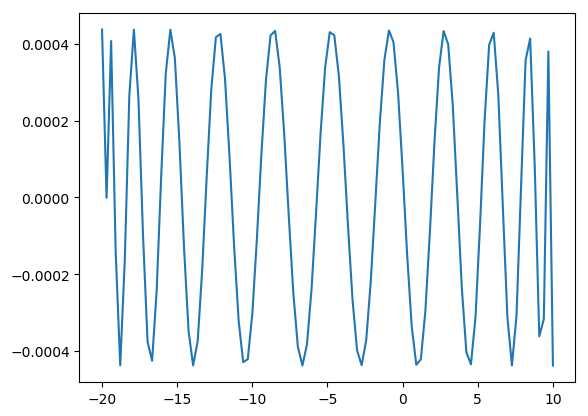

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000398DED30>

In [31]:
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

## Przesterowany sinus

In [32]:
function f(x) 
    if sin(x) >= 0
        min(sin(x), 0.7)
    else
        max(sin(x), -0.7) 
    end
end

n = 22
iterations = 70
a = 5.0 
b = 30.0

30.0

#### Punkty startowe równoodległe

In [33]:
pts = even_spaced_points(n, a, b, BigFloat)
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), iterations)

(::p) (generic function with 1 method)

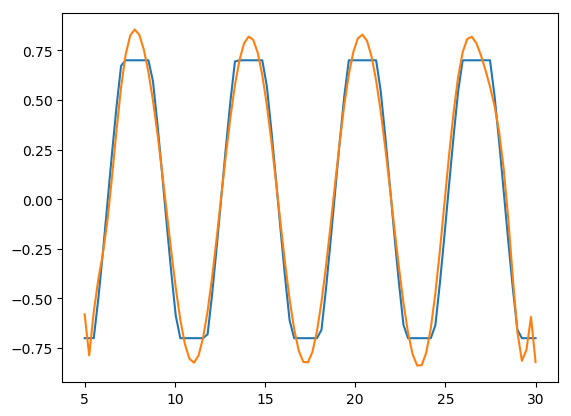

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003AC78898>

In [34]:
plot(linspace(a, b, 100), map(f, linspace(a, b, 100)))
plot(linspace(a, b, 100), map(x -> Float64(remez_poly(x)), linspace(a, b, 100)))

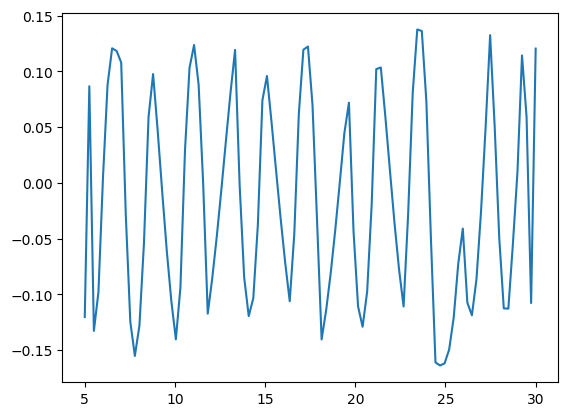

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003AEAC668>

In [35]:
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### Punkty startowe Czebyszewa

In [36]:
pts = chebyshev_extremes_points(n, a, b, BigFloat)
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), iterations)

(::p) (generic function with 1 method)

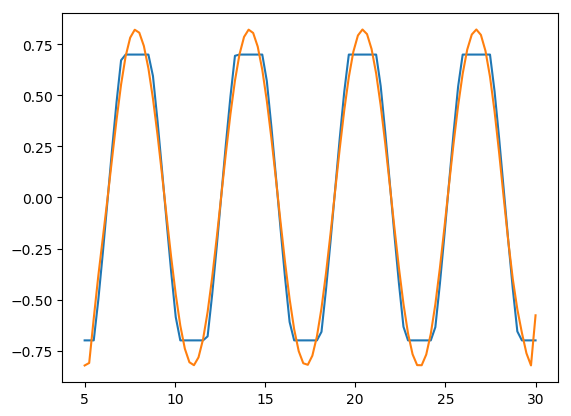

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003AF99F98>

In [37]:
plot(linspace(a, b, 100), map(f, linspace(a, b, 100)))
plot(linspace(a, b, 100), map(x -> Float64(remez_poly(x)), linspace(a, b, 100)))

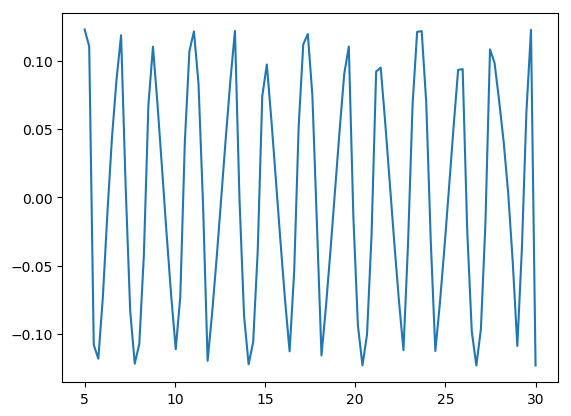

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003B251D68>

In [38]:
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

## $f(x) = x^2 sin(\frac{1}{x})$ 

In [39]:
f(x) = x^2 * sin(1/x)
n = 33
iterations = 59
a = 0.001
b = 0.1

0.1

#### Punkty startowe równoodległe

In [40]:
pts = even_spaced_points(n, a, b, BigFloat)
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), iterations)

(::p) (generic function with 1 method)

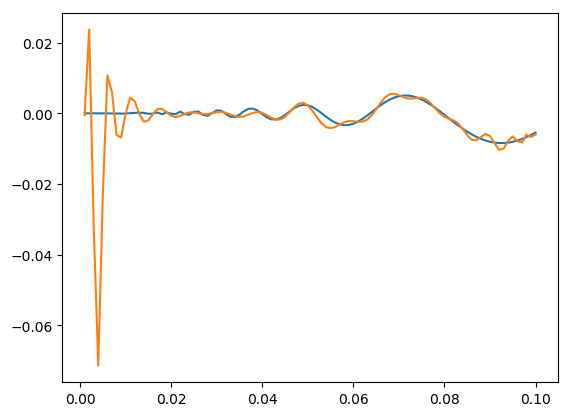

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003B600DD8>

In [41]:
plot(linspace(a, b, 100), map(f, linspace(a, b, 100)))
plot(linspace(a, b, 100), map(x -> Float64(remez_poly(x)), linspace(a, b, 100)))

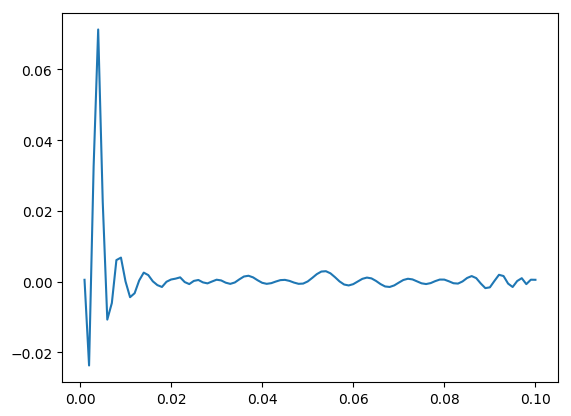

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003B849208>

In [42]:
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### Punkty startowe Czebyszewa

In [43]:
pts = chebyshev_extremes_points(n, a, b, BigFloat)
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), iterations)

(::p) (generic function with 1 method)

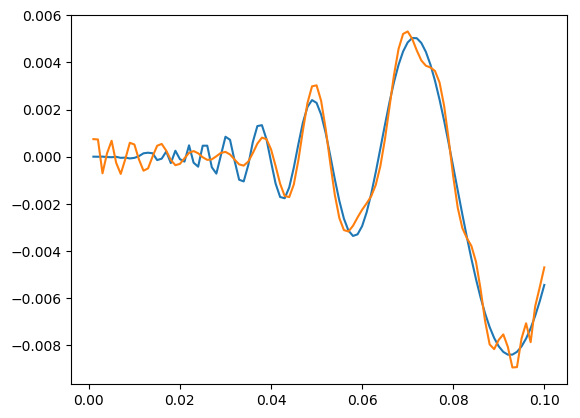

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003BA6C358>

In [44]:
plot(linspace(a, b, 100), map(f, linspace(a, b, 100)))
plot(linspace(a, b, 100), map(x -> Float64(remez_poly(x)), linspace(a, b, 100)))

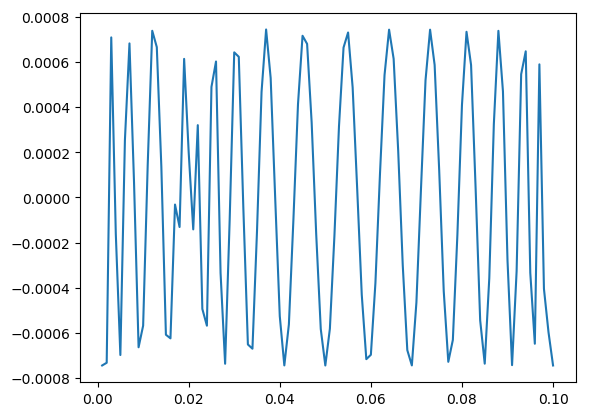

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003BCB9588>

In [45]:
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

# Analiza działania algorytmu krok po kroku, dla funkcji $f(x) = \mid x \mid$ 

In [46]:
f(x) = abs(x)
n = 4
a = -1
b = 4

4

## Punkty startowe równoodległe

In [47]:
pts = even_spaced_points(n, a, b, BigFloat)

6-element Array{BigFloat,1}:
 -1.000000000000000000000000000000000000000000000000000000000000000000000000000000
  0.000000000000000000000000000000000000000000000000000000000000000000000000000000
  1.000000000000000000000000000000000000000000000000000000000000000000000000000000
  2.000000000000000000000000000000000000000000000000000000000000000000000000000000
  3.000000000000000000000000000000000000000000000000000000000000000000000000000000
  4.000000000000000000000000000000000000000000000000000000000000000000000000000000

#### 1

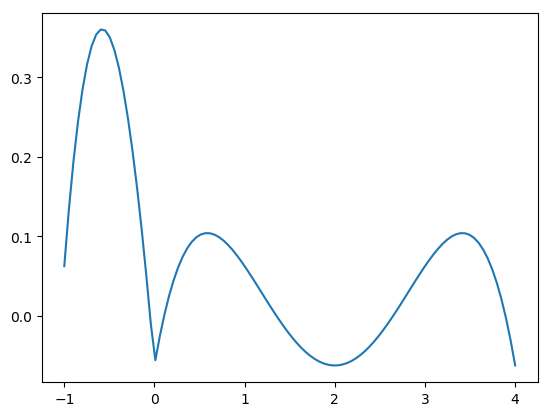

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003BFD3710>

In [48]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 1)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 2

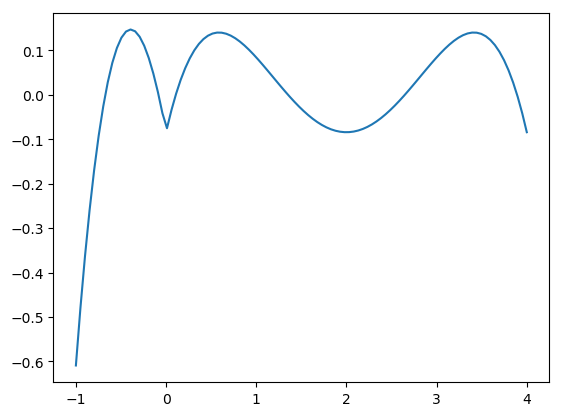

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003C1BC358>

In [49]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 2)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 3

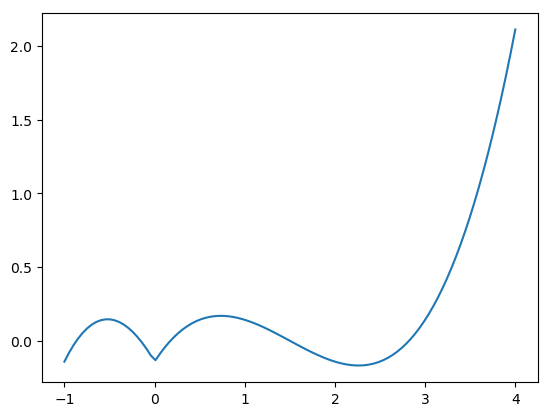

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003C43FBA8>

In [50]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 3)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 4

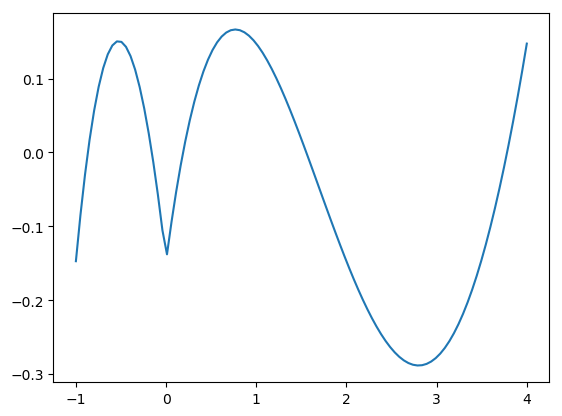

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003C606208>

In [51]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 4)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 5

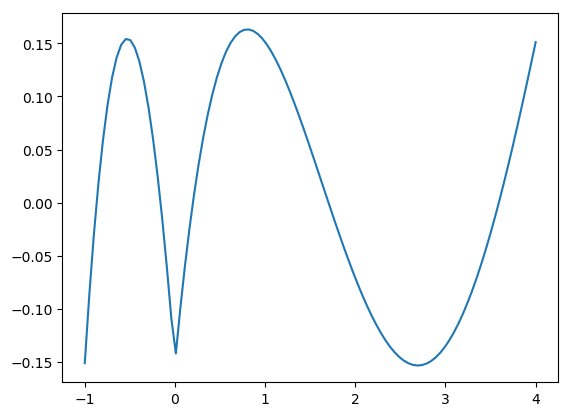

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003C75C2B0>

In [52]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 5)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 6

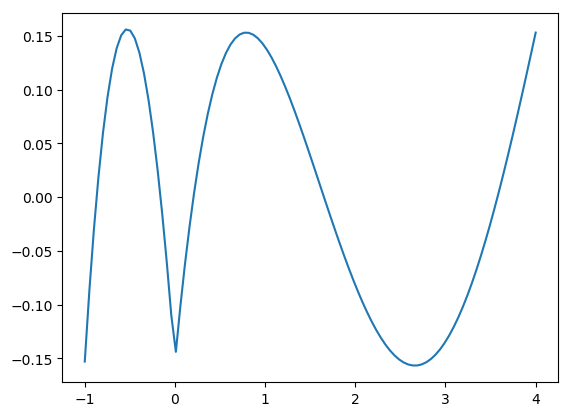

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002F8F7C18>

In [53]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 6)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

## Punkty startowe Czebyszewa

In [54]:
pts = chebyshev_extremes_points(n, a, b, BigFloat)

6-element Array{BigFloat,1}:
 -1.000000000000000000000000000000000000000000000000000000000000000000000000000000    
 -5.225424859373683506014174326992360875010490417480468750000000000000000000000000e-01
  7.274575140626316493985825673007639124989509582519531250000000000000000000000000e-01
  2.272542485937368628157173588988371193408966064453125000000000000000000000000000    
  3.522542485937368628157173588988371193408966064453125000000000000000000000000000    
  4.000000000000000000000000000000000000000000000000000000000000000000000000000000    

#### 1

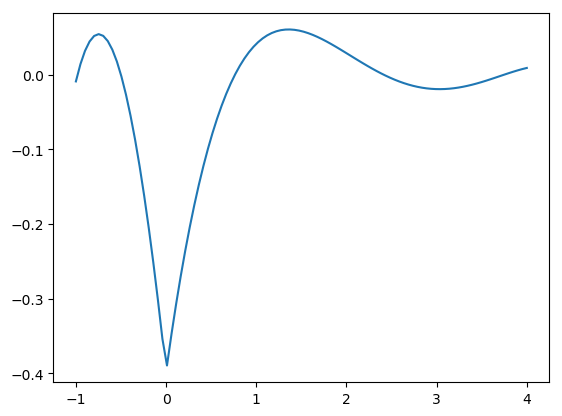

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002FBCA6A0>

In [55]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 1)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 2

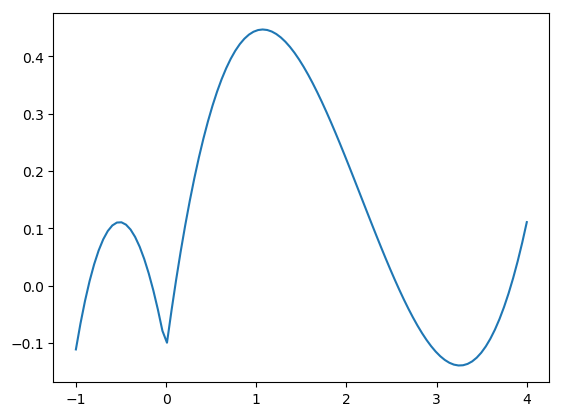

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002FDEF668>

In [56]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 2)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 3

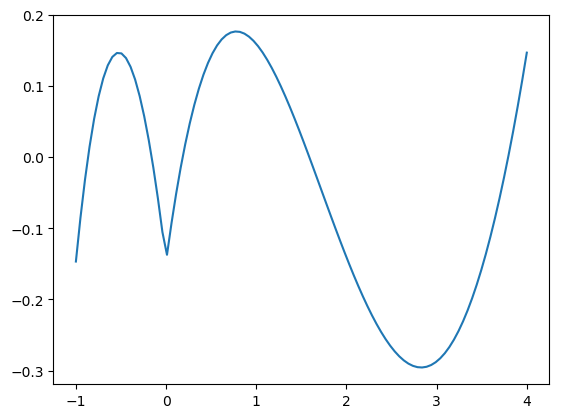

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000030037B70>

In [57]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 3)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 4

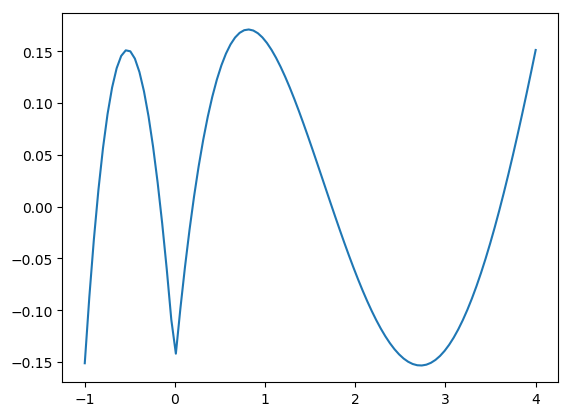

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000302880B8>

In [58]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 4)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 5

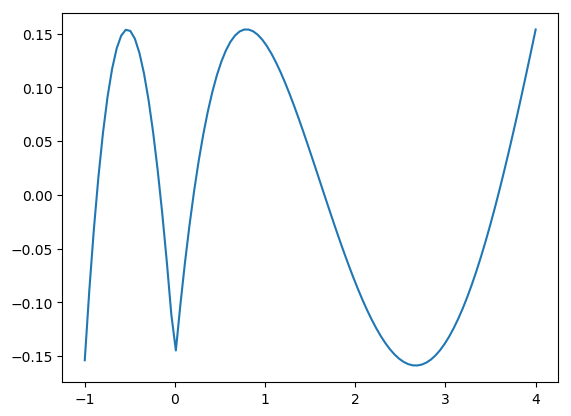

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000030524A20>

In [59]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 5)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 6

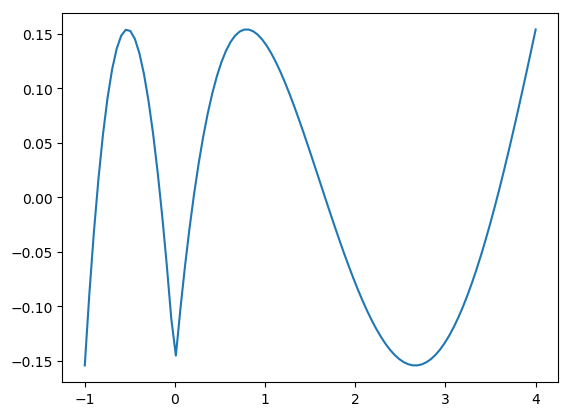

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003066D3C8>

In [60]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 6)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

# Analiza działania algorytmu krok po kroku, dla funkcji $f(x) = \frac{1}{x}$ 

In [61]:
f(x) = 1/x
n = 4
a = 1
b = 5

5

## Punkty startowe równoodległe

In [62]:
pts = even_spaced_points(n, a, b, BigFloat)

6-element Array{BigFloat,1}:
 1.000000000000000000000000000000000000000000000000000000000000000000000000000000
 1.800000000000000044408920985006261616945266723632812500000000000000000000000000
 2.600000000000000088817841970012523233890533447265625000000000000000000000000000
 3.399999999999999911182158029987476766109466552734375000000000000000000000000000
 4.200000000000000177635683940025046467781066894531250000000000000000000000000000
 5.000000000000000000000000000000000000000000000000000000000000000000000000000000

#### 1

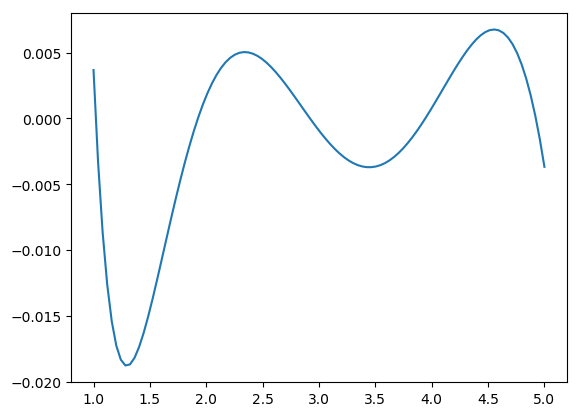

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003CA5AE10>

In [63]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 1)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 2

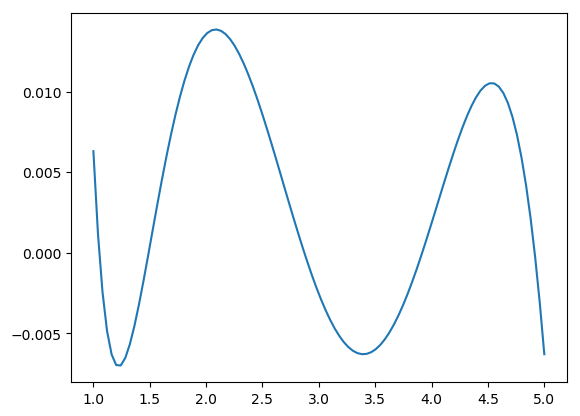

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003CE17A20>

In [64]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 2)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 3

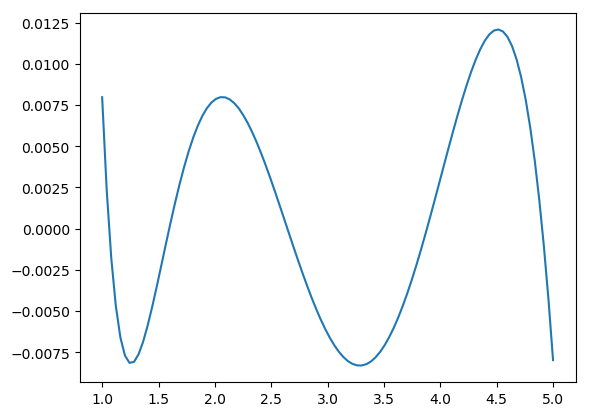

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003D07F940>

In [65]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 3)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 4

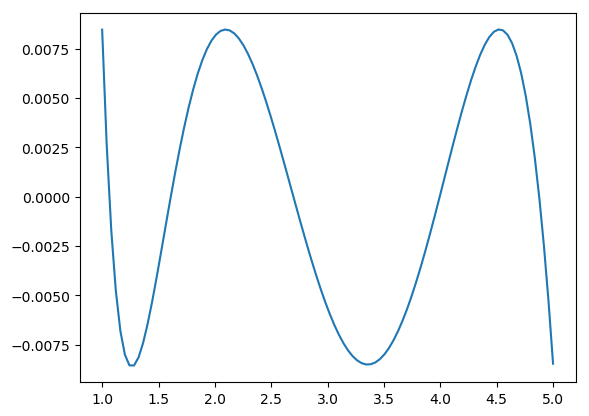

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003D32E908>

In [66]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 4)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 5

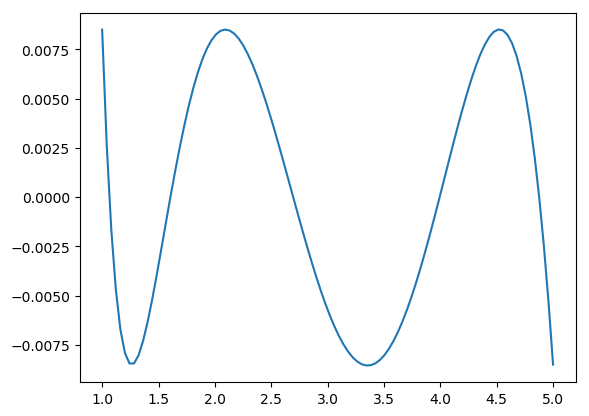

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003D596FD0>

In [67]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 5)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 6

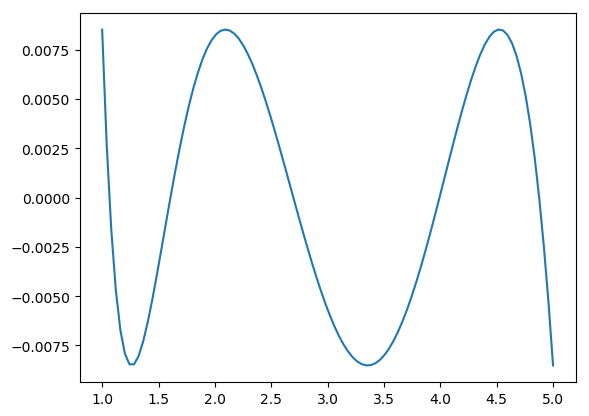

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003D81C6D8>

In [68]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 6)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

## Punkty startowe Czebyszewa

In [69]:
pts = chebyshev_extremes_points(n, a, b, BigFloat)

6-element Array{BigFloat,1}:
 1.000000000000000000000000000000000000000000000000000000000000000000000000000000
 1.381966011250105319518866053840611129999160766601562500000000000000000000000000
 2.381966011250105319518866053840611129999160766601562500000000000000000000000000
 3.618033988749894902525738871190696954727172851562500000000000000000000000000000
 4.618033988749894902525738871190696954727172851562500000000000000000000000000000
 5.000000000000000000000000000000000000000000000000000000000000000000000000000000

#### 1

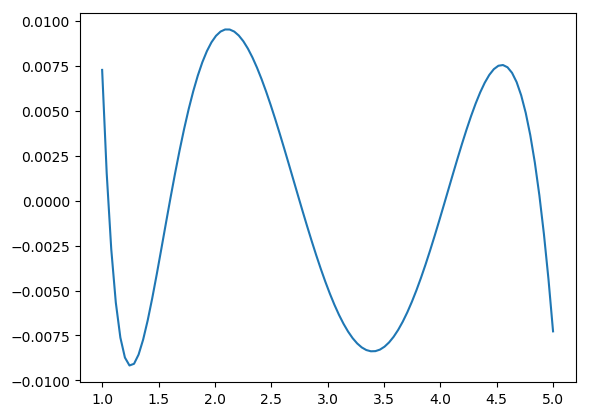

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003DA97DA0>

In [70]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 1)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 2

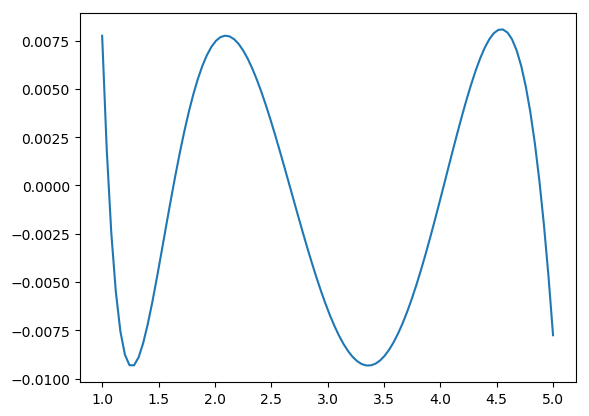

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003DD0ED68>

In [71]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 2)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 3

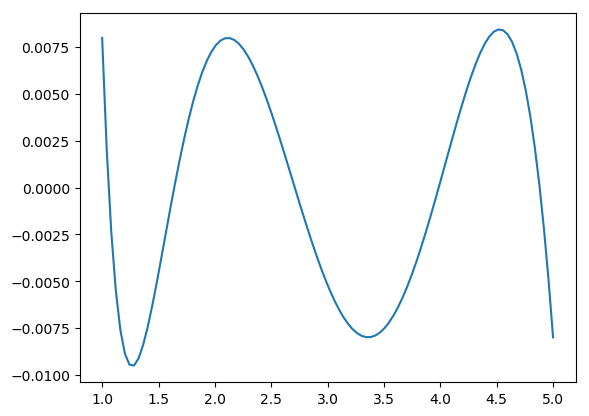

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003DF918D0>

In [72]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 3)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 4

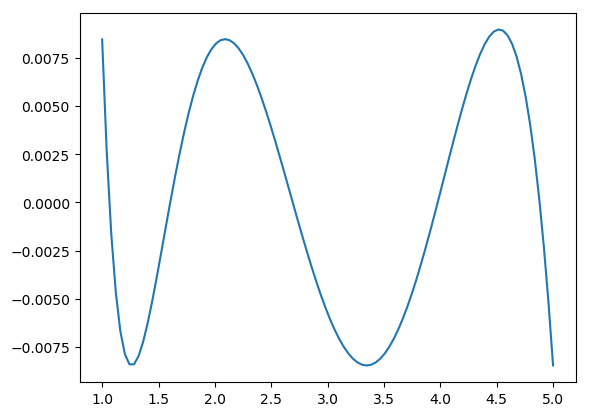

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003E1E1438>

In [73]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 4)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 5

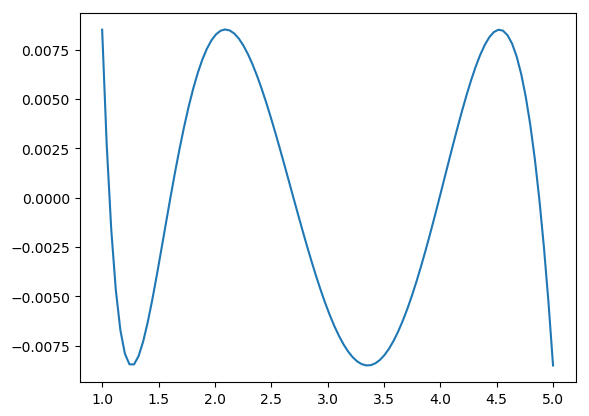

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003E327B00>

In [74]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 5)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))

#### 6

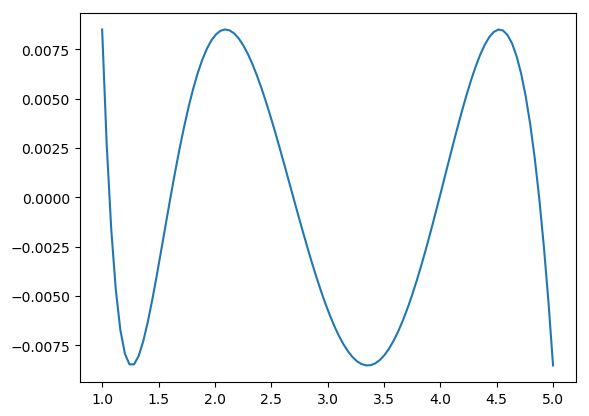

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003E723208>

In [75]:
remez_poly = remez_algorithm(f, pts, BigFloat(a), BigFloat(b), 6)
plot(linspace(a, b, 100), map(x -> Float64(f(x) - remez_poly(x)), linspace(a, b, 100)))